In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.linalg import null_space
import graphviz

pi = math.pi
cos = np.cos
sin = np.sin
exp = np.exp

In [217]:
# num of majority 
N = 1000
NN = int(N / 5)
# num of minority 
M = 50

r = np.random.rand(NN) * 2
s = np.random.rand(NN) * 2*pi - pi

r2 = np.random.rand(NN) * 2
s2 = np.random.rand(NN) * 2*pi - pi

r3 = np.random.rand(NN) * 1
s3 = np.random.rand(NN) * 2*pi - pi

r4 = np.random.rand(NN) * 3
s4= np.random.rand(NN) * 2*pi - pi

r5 = np.random.rand(NN) * 1
s5 = np.random.rand(NN) * 2*pi - pi
x_major = r * cos (s) -2 
y_major = r * sin (s) -2
x_major2 = r2 * cos (s2) -1 
y_major2 = r2 * sin (s2) -0
x_major3 = r3 * cos (s3) -1 
y_major3 = r3 * sin (s3) +3
x_major4 = r4 * cos (s4) +1 
y_major4 = r4 * sin (s4) +1
x_major5 = r5 * cos (s5) +3
y_major5 = r5 * sin (s5) -1
x_major_ = np.hstack((x_major,x_major2,x_major3,x_major4,x_major5)).reshape((N,1)) 
y_major_ = np.hstack((y_major,y_major2,y_major3,y_major4,y_major5)).reshape((N,1)) 

r2 = np.random.rand(M) * 2
s2 = np.random.rand(M) * 2*pi - pi
x_minor = r2 * cos (s2) + 2 
y_minor = r2 * sin (s2) + 2

major = np.hstack((x_major_.reshape(N,1),y_major_.reshape(N,1))) 
minor = np.hstack((x_minor.reshape(M,1),y_minor.reshape(M,1)))
                  
tot = np.vstack((major,minor))
target_tot = np.vstack(( np.zeros(shape=(N,1)) , np.ones(shape=(M,1))) )

In [218]:
x_major_.shape

(1000, 1)

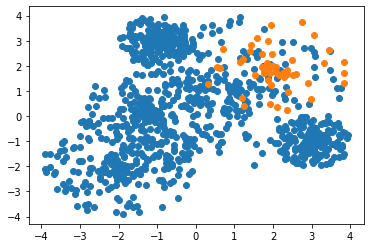

In [219]:
plt.scatter(x_major_,y_major_)
plt.scatter(x_minor,y_minor)

In [220]:
def d (x,y):
   # print(x-y)
    return np.linalg.norm(x-y,ord= 2)
def findinitialcentroids(major_list):
    #first pick 1 point
    centroid = np.zeros((5,2))
    centroid[0] = major_list[0] 
    c_cnt = 1
    eps = 0.00001
    
    while(c_cnt < 5):
        maxv=0
        for idx,major_eli in enumerate(major_list):
          #  print(major_eli)
            dsummer = 0
            for c_i in range (0,c_cnt):
                dsummer += 1/ (eps + d( major_eli, centroid[c_i]))
         #   print(dsummer)
            dsummer = 1/(dsummer * 5)
            if maxv < dsummer:
                maxv = dsummer
                centroid[c_cnt] = major_eli
       # print(centroid)
        c_cnt+=1
    plt.scatter(centroid[:,0],centroid[:,1])
    return centroid;

def moveCentroid ( major_list,centroid,thres,itr=10 ):
    for i in range (1,itr):
        for j in range (0,5):
            nearlist = np.empty((1,2))
            for major_eli in major_list:
                if d(centroid[j], major_eli) < thres:
                    nearlist = np.vstack((nearlist, major_eli))
            nearlist = np.delete(nearlist,0,0)
            #print(nearlist)
 #           print(np.average(nearlist,0))
            centroid[j] = np.average(nearlist,0)
            del nearlist
    print(centroid)
    plt.scatter(centroid[:,0],centroid[:,1])
    return centroid       

1.8493155945442001


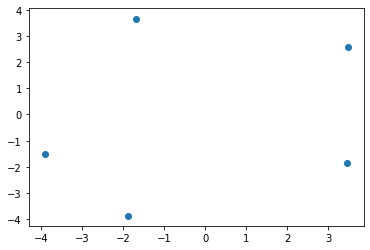

In [221]:
cent = findinitialcentroids(major)
threshold = d ( cent[3] , cent[4] ) / 4
print(threshold)


[[-1.69987526 -1.65776762]
 [ 1.06712333  1.06166636]
 [-0.84823172  2.68317372]
 [ 2.94397829 -0.97607852]
 [-1.78601248 -1.50609173]]


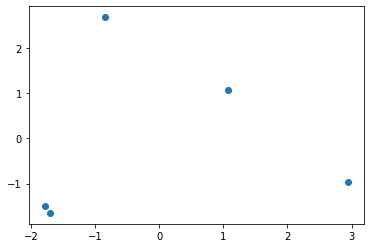

In [222]:
newcent = moveCentroid(major,cent,threshold,5)

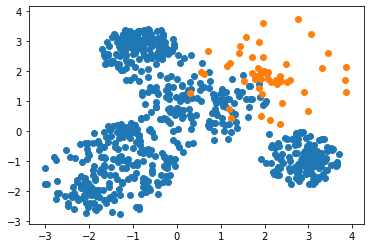

In [223]:
US_major = np.hstack((np.array(major), np.zeros((N,1)) ))
eps = 0.00001
for idx,maj in enumerate(major):
    point = 1 / (eps + d(maj, newcent[0])) +  1 / (eps + d(maj, newcent[1])) +  1 / (eps + d(maj, newcent[2])) +  1 / (eps + d(maj, newcent[3]))  + 1 / (eps + d(maj, newcent[4])) 
    US_major[idx][2] = point
US_major_sorted = sorted(US_major, key=lambda a_entry: a_entry[2],reverse=True)
US_major = US_major_sorted[1:M*15]

us = np.array(US_major)
plt.scatter(us[:,0],us[:,1])
plt.scatter(x_minor,y_minor)

19.0
Error Ratio for depth 3 dicision tree is : 3.3333333333333335% 
Major Error Ratio: 1.9% 
Minor Error Ratio: 32.0% 


[Text(141.64615384615385, 190.26, 'X[0] <= 1.152\nmse = 0.045\nsamples = 1050\nvalue = 0.048'),
 Text(51.50769230769231, 135.9, 'X[0] <= 0.306\nmse = 0.005\nsamples = 729\nvalue = 0.005'),
 Text(25.753846153846155, 81.53999999999999, 'mse = 0.0\nsamples = 653\nvalue = 0.0'),
 Text(77.26153846153846, 81.53999999999999, 'X[0] <= 0.311\nmse = 0.05\nsamples = 76\nvalue = 0.053'),
 Text(51.50769230769231, 27.180000000000007, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(103.01538461538462, 27.180000000000007, 'mse = 0.038\nsamples = 75\nvalue = 0.04'),
 Text(231.7846153846154, 135.9, 'X[1] <= 1.204\nmse = 0.123\nsamples = 321\nvalue = 0.143'),
 Text(180.27692307692308, 81.53999999999999, 'X[1] <= 0.225\nmse = 0.027\nsamples = 251\nvalue = 0.028'),
 Text(154.52307692307693, 27.180000000000007, 'mse = 0.0\nsamples = 218\nvalue = 0.0'),
 Text(206.03076923076924, 27.180000000000007, 'mse = 0.167\nsamples = 33\nvalue = 0.212'),
 Text(283.2923076923077, 81.53999999999999, 'X[0] <= 1.683\nmse = 0.

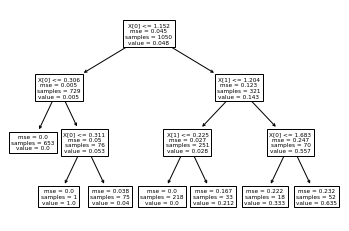

In [224]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(tot, target_tot)
train_result =clf.predict(tot)
#Dicsiontree Result
summer = 0
summer_major = 0
summer_minor = 0
for idx,result_ in enumerate(train_result):
    #print(result_)
    if result_>0.5:
     #   print(target_tot[idx][0])
        diff = np.abs(1-target_tot[idx][0])
        summer = summer + diff
        
    else :
        diff = np.abs(0-target_tot[idx][0])
        summer = summer + diff
    if target_tot[idx][0] == 1:
        summer_minor += diff
    if target_tot[idx][0] == 0:
        summer_major += diff
print(summer_major)
print( 'Error Ratio for depth 3 dicision tree is : '+ str(summer / (N+M) * 100)  +'% ')
print( 'Major Error Ratio: '+ str(summer_major / (N) * 100)  +'% ')
print( 'Minor Error Ratio: '+ str(summer_minor / (M) * 100)  +'% ')

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
tree.plot_tree(clf) 

25.0
Error Ratio for depth 3 dicision tree is : 3.8095238095238098% 
Major Error Ratio: 2.5% 
Minor Error Ratio: 30.0% 


[Text(141.64615384615385, 190.26, 'X[0] <= 1.146\nmse = 0.059\nsamples = 799\nvalue = 0.063'),
 Text(51.50769230769231, 135.9, 'X[0] <= 0.306\nmse = 0.007\nsamples = 548\nvalue = 0.007'),
 Text(25.753846153846155, 81.53999999999999, 'mse = 0.0\nsamples = 490\nvalue = 0.0'),
 Text(77.26153846153846, 81.53999999999999, 'X[1] <= 1.877\nmse = 0.064\nsamples = 58\nvalue = 0.069'),
 Text(51.50769230769231, 27.180000000000007, 'mse = 0.019\nsamples = 52\nvalue = 0.019'),
 Text(103.01538461538462, 27.180000000000007, 'mse = 0.25\nsamples = 6\nvalue = 0.5'),
 Text(231.7846153846154, 135.9, 'X[1] <= 1.572\nmse = 0.15\nsamples = 251\nvalue = 0.183'),
 Text(180.27692307692308, 81.53999999999999, 'X[1] <= 0.225\nmse = 0.049\nsamples = 214\nvalue = 0.051'),
 Text(154.52307692307693, 27.180000000000007, 'mse = 0.0\nsamples = 181\nvalue = 0.0'),
 Text(206.03076923076924, 27.180000000000007, 'mse = 0.222\nsamples = 33\nvalue = 0.333'),
 Text(283.2923076923077, 81.53999999999999, 'X[0] <= 1.516\nmse = 0

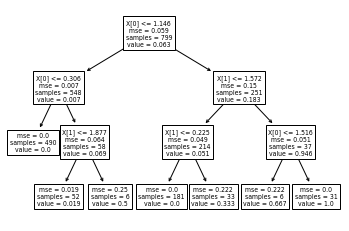

In [225]:
(newN,dum)=us.shape
xy_undersampled = np.vstack((us[:,0:2],minor))
target_undersampled = np.vstack(( np.zeros(shape=(newN,1)) , np.ones(shape=(M,1))) )

clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(xy_undersampled, target_undersampled)
train_result =clf.predict(tot)
#Dicsiontree Result
summer = 0
summer_major = 0
summer_minor = 0
for idx,result_ in enumerate(train_result):
    #print(result_)
    if result_>0.5:
     #   print(target_tot[idx][0])
        diff = np.abs(1-target_tot[idx][0])
        summer = summer + diff
        
    else :
        diff = np.abs(0-target_tot[idx][0])
        summer = summer + diff
    if target_tot[idx][0] == 1:
        summer_minor += diff
    if target_tot[idx][0] == 0:
        summer_major += diff
print(summer_major)
print( 'Error Ratio for depth 3 dicision tree is : '+ str(summer / (N+M) * 100)  +'% ')
print( 'Major Error Ratio: '+ str(summer_major / (N) * 100)  +'% ')
print( 'Minor Error Ratio: '+ str(summer_minor / (M) * 100)  +'% ')

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
tree.plot_tree(clf) 

In [204]:
us

array([[-1.00444591,  2.88784675, 38.37239112],
       [ 3.01539545, -0.95096793, 37.10168757],
       [-0.96704897,  2.84824125, 36.3640522 ],
       ...,
       [ 0.98638887,  1.00274757,  2.12550316],
       [ 0.82910988,  1.23532453,  2.12033327],
       [ 0.9039844 ,  1.14061717,  2.11844719]])